# CC 14: Statistical Mechanics - All Codes

## Needed Modules

In [1]:
import numpy as np
from scipy.integrate import quad
import scipy.constants as const
import matplotlib.pyplot as plt

## Specific Heat of Solids
Here we are consedering molar specific heats.
### Dulong Petit's Law
$$ c = 3N_A k_B $$

### Einstein's Theory
$$ c = 3N_A k_B \frac{x^2 e^x}{(e^x-1)^2} $$
where, $x=\frac{T_E}{T}$ and $T_E$ is the Einstein temperature.

### Debye's Theory
$$ c = \frac{9N_A k_B}{x^3} \int_{0}^{x} \frac{\xi^4 e^\xi}{(e^\xi-1)^2} d\xi $$
where, $x=\frac{T_D}{T}$ and $T_D$ is the Debye temperature.


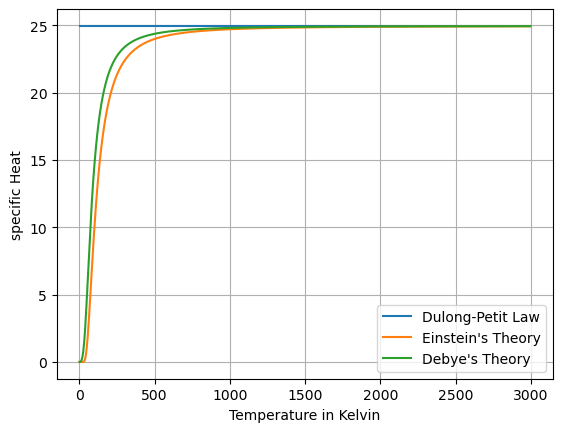

In [2]:
kb = const.Boltzmann
h = const.Planck
Na = const.Avogadro

def c_DulongPetit(T):
    return 3*Na*kb*np.ones((len(T),))

def c_Einstein(Te, T):
    x = Te/T
    return 3*Na*kb*(x**2)*np.exp(x)/((np.exp(x)-1)**2)

def c_Debye(Td, T):
    y = lambda x: (x**4)*(np.exp(x))/((np.exp(x)-1)**2)
    cdebye = []
    for Ti in T:
        xi = Td/Ti
        intgy, err = quad(y, 0, xi)
        y0 = 9*Na*kb/xi**3
        cdebye.append(y0*intgy)
    return np.array(cdebye)

T = np.arange(1,3000,3)
Td = 345
v = kb*Td/h
Te = Td    # let

plt.plot(T, c_DulongPetit(T),label='Dulong-Petit Law')
plt.plot(T, c_Einstein(Te, T),label='Einstein\'s Theory')
plt.plot(T, c_Debye(Td, T),label='Debye\'s Theory')
plt.xlabel('Temperature in Kelvin')
plt.ylabel('specific Heat')
plt.legend()
plt.grid()
plt.show()

## Radiation Laws

### Planck's Law
$$ f_{Planck}(\lambda, T) = \frac{8\pi hc}{\lambda^5\,(\exp(hc/\lambda k_BT)-1)}  $$

### Rayleigh-Jeans Law
$$ f_{Rayleigh}(\lambda, T) = \frac{8\pi k_BT}{\lambda^4} $$

### Wien's Law
$$ f_{Wein}(\lambda, T) = \frac{8\pi hc}{\lambda^5\,\exp(hc/\lambda k_BT)}  $$

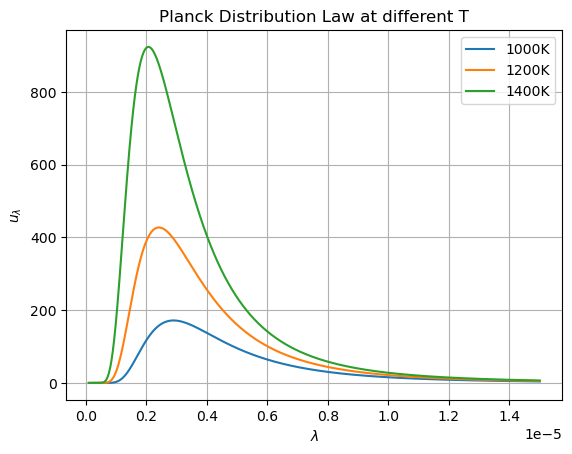

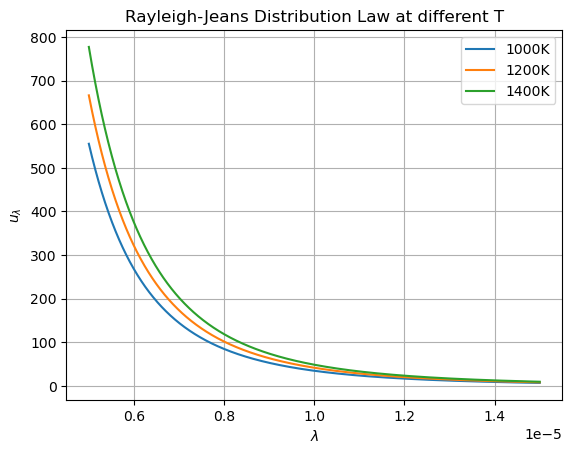

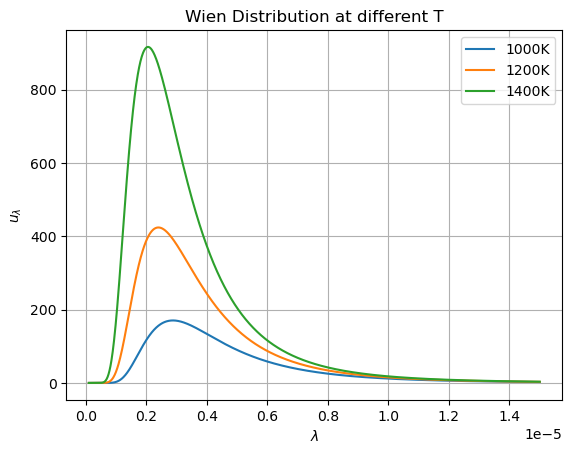

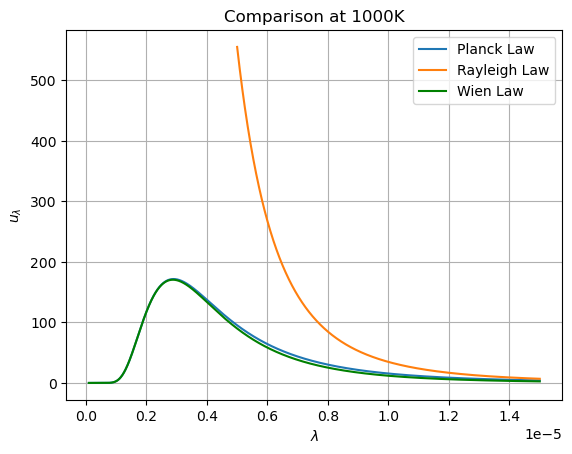

In [3]:
kb = const.Boltzmann
h = const.Planck
c = const.speed_of_light

n=1400
l = np.linspace(0.1e-6,15e-6,n)
l1 = np.linspace(5e-6,15e-6,n)   # For Rayleigh Jeans
T = [1000, 1200, 1400]

def f_Planck(lam,T):
   return 8*(np.pi)*h*c/((lam**5)*(np.exp(h*c/(kb*lam*T))-1))

def f_Rayleigh(lam,T):
    return 8*(np.pi)*kb*T/(lam**4)

def f_Wien(lam,T):
    return 8*(np.pi)*h*c/((lam**5)*(np.exp(h*c/(kb*lam*T))))

for Ti in T:
    plt.plot(l, f_Planck(l, Ti), label=f'{Ti}K')
plt.title("Planck Distribution Law at different T")
plt.xlabel('$\lambda$')
plt.ylabel('$u_\lambda$')
plt.legend()
plt.grid()
plt.show()

for Ti in T:
    plt.plot(l1, f_Rayleigh(l1, Ti), label=f'{Ti}K')
plt.title("Rayleigh-Jeans Distribution Law at different T")
plt.xlabel('$\lambda$')
plt.ylabel('$u_\lambda$')
plt.legend()
plt.grid()
plt.show()

for Ti in T:
    plt.plot(l, f_Wien(l, Ti), label=f'{Ti}K')
plt.title("Wien Distribution at different T")
plt.xlabel('$\lambda$')
plt.ylabel('$u_\lambda$')
plt.legend()
plt.grid()
plt.show()

T_all = 1000
plt.plot(l, f_Planck(l, T_all), label='Planck Law')
plt.plot(l1, f_Rayleigh(l1, T_all), label='Rayleigh Law')
plt.plot(l, f_Wien(l, T_all),'g', label='Wien Law')
plt.title(f"Comparison at {T_all}K")
plt.xlabel('$\lambda$')
plt.ylabel('$u_\lambda$')
plt.legend()
plt.grid()
plt.show()

## Statistical Distributions
The 3 statistical distributions are,
- Maxwell-Boltzmann distribution:
$$ f(\epsilon) = \frac{1}{\exp(\epsilon/k_BT)} $$
- Fermi-Dirac distribution:
$$ f(\epsilon) = \frac{1}{\exp(\epsilon/k_BT)+1} $$
- Bose-Einstein distribution:
$$ f(\epsilon) = \frac{1}{\exp(\epsilon/k_BT)-1} $$

We can write a general form of all these distributions by,
$$ f(\epsilon) = \frac{1}{\exp(\epsilon/k_BT)+k} $$
where,
- $k=0$ for Maxwell-Boltzmann distribution
- $k=1$ for Fermi-Dirac distribution
- $k=-1$ for Bose-Einstein distribution

In [4]:
import numpy as np
import matplotlib.pyplot as plt

kb = const.Boltzmann

In [5]:
def all_distr(en, T, k_select):
   func = 1/(np.exp(en/(kb*T)) + k_select)
   return func

Ts = [1, 5, 10, 20]   # Temperatures

### Maxwell-Boltzmann distribution at different Temperature 

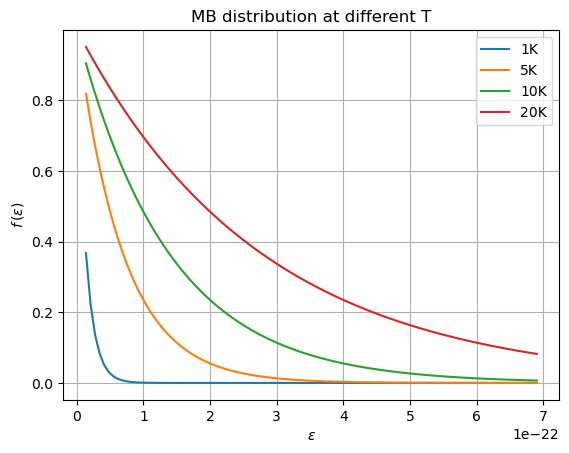

In [6]:
en1 = np.linspace(1,50,100)*const.Boltzmann*Ts[0]

for Ti in Ts:
   plt.plot(en1, all_distr(en1, Ti, 0), label=f'{Ti}K')

plt.title('MB distribution at different T')
plt.xlabel('$\epsilon$')
plt.ylabel('$f\,(\epsilon)$')
plt.legend()
plt.grid()
plt.show()

### Fermi-Dirac distribution at different Temperature

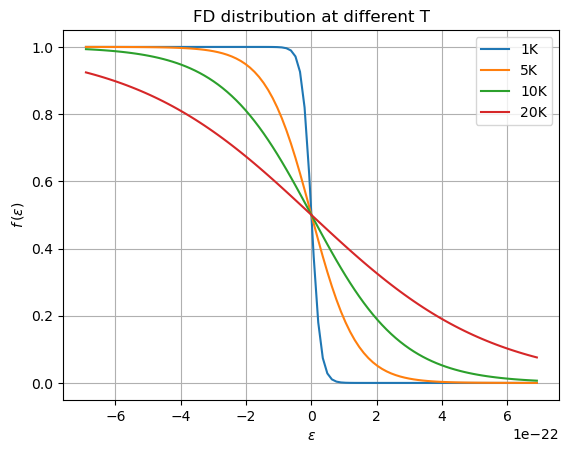

In [7]:
en2 = np.linspace(-50,50,100)*const.Boltzmann*Ts[0]

for Ti in Ts:
   plt.plot(en2, all_distr(en2, Ti, 1), label=f'{Ti}K')

plt.title('FD distribution at different T')
plt.xlabel('$\epsilon$')
plt.ylabel('$f\,(\epsilon)$')
plt.legend()
plt.grid()
plt.show()

### Bose-Einstein distribution at different Temperature

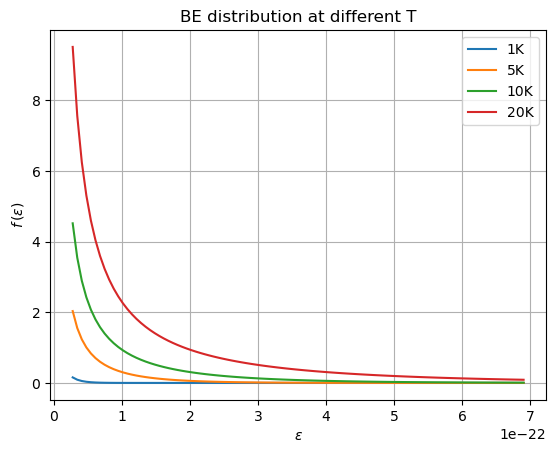

In [8]:
en3 = np.linspace(2,50,100)*const.Boltzmann*Ts[0]

for Ti in Ts:
   plt.plot(en3, all_distr(en3, Ti, -1), label=f'{Ti}K')
   
plt.title('BE distribution at different T')
plt.xlabel('$\epsilon$')
plt.ylabel('$f\,(\epsilon)$')
plt.legend()
plt.grid()
plt.show()

### All in One plot

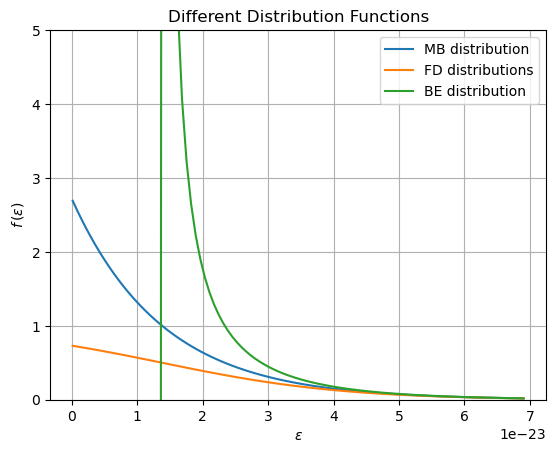

In [9]:
def MB_dist(en, T):
   u = kb*T
   bt = 1/u
   func = 1/(np.exp(bt*(en-u)))
   return func
def FD_dist(en, mu, T):
   u = kb*T
   bt = 1/u
   func = 1/(np.exp(bt*(en-mu)) +1)
   return func
def BE_dist(en, mu, T):
   u = kb*T
   bt = 1/u
   func = 1/(np.exp(bt*(en-mu)) -1)
   return func

T0 = 1
u = kb*T0
bt = 1/u
en = np.linspace(0.01, 5,100)*u

MB_all = MB_dist(en, T0)
FD_all = FD_dist(en, u, T0)
BE_all = BE_dist(en, u, T0)

plt.plot(en, MB_all, label='MB distribution')
plt.plot(en, FD_all, label='FD distributions')
plt.plot(en, BE_all, label='BE distribution')
plt.ylim([0,5])
plt.title('Different Distribution Functions')
plt.xlabel('$\epsilon$')
plt.ylabel('$f\,(\epsilon)$')
plt.legend()
plt.grid()
plt.show()